# **AIN 214 - PA3 - FALL 2024**




**Student Number** :2220765041

**Name Surname**   :Sude Naz Öztürk


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 29.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **Data Prepocessing and Regression**

---
**Dataset Path:** "Data/insurance.csv"
---

We will deal with the insurance dataset. This dataset contains data on individual medical insurance costs based on several demographic and personal health factors.

**Features:**


* Age: Age of the individual
* Sex: Gender of the individual
* BMI: Body Mass Index, a measure of body fat based on height and weight
* Children: Number of children/dependents
* Smoker: Whether the individual smokes or not
* Region: Geographical region in the US
* Charges: Medical expenses (target variable for regression)

# **Necessary Imports**

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# **PART- 1: Data Preprocessing (50 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [491]:
# Read csv
df = pd.read_csv("Data/insurance.csv")

In [492]:
# 1.1.1.Check for missing values

print("MISSING VALUES:")
print(df.isnull().sum())

#There is no missing values in this dataset

MISSING VALUES:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


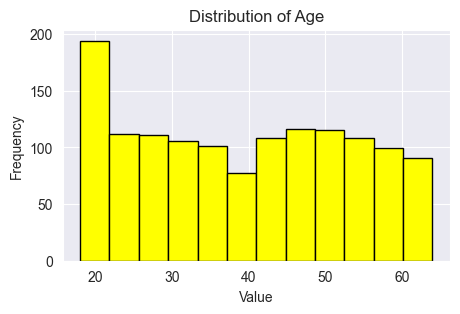

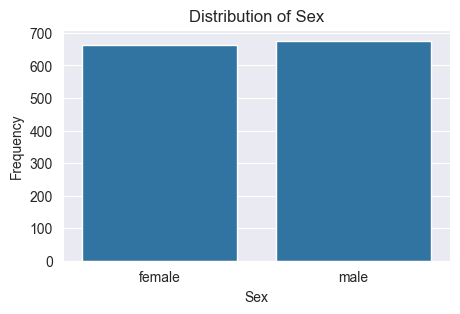

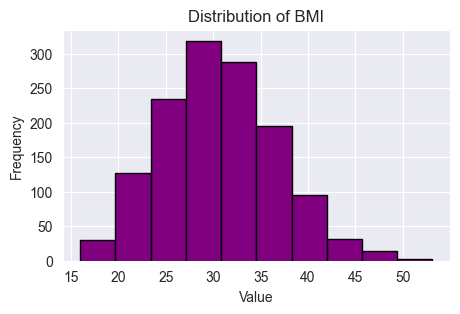

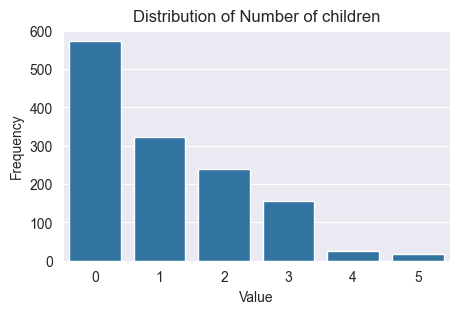

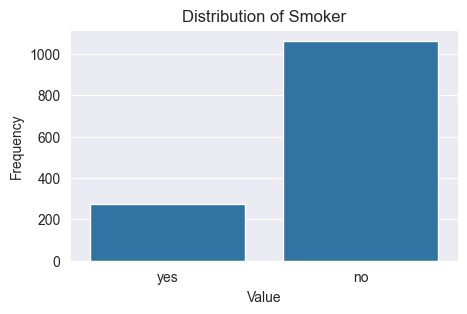

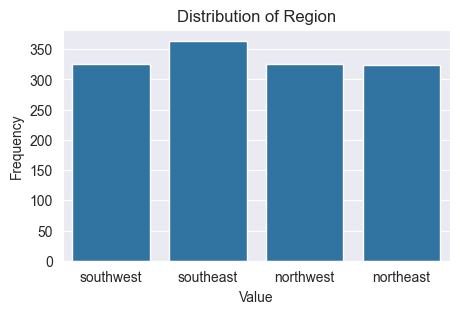

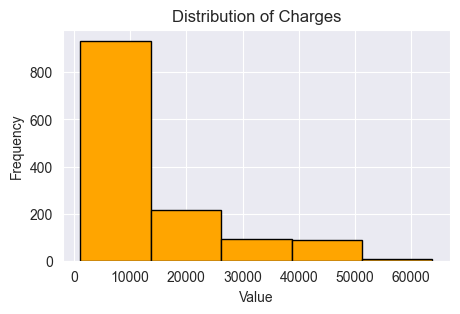

In [493]:
# 1.1.2.Visualize the features with any relevant plots to understand the distribution of data

# Distribution of age
bin_count = int(np.ceil(np.log2(len(df['age'])) + 1)) # I use mathematical bin count formula for better solution
df['age'].hist(bins=bin_count, color = 'yellow',edgecolor='k', figsize=(5,3))
plt.title('Distribution of Age')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# There is an instance frequency in the 20s. This shows that the majority of individuals in the dataset are in the younger age group.
# There is an imbalance situation between age groups in the dataset


# Distribution of sex with count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()
# Gender distribution is almost same.

# Distribution of BMI
df['bmi'].hist(bins=10, color = 'purple', edgecolor='k', figsize=(5,3))
plt.title('Distribution of BMI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
#There is almost symmetric distrubution here also it is unimodal. There is a peak in 25-30 bmi interval.

# Distribution of Number of children with count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='children', data=df)
plt.title('Distribution of Number of children')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# The distribution is heavily skewed to the right (positively skewed), meaning most individuals have fewer children.


# Distribution of Smoker with count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='smoker', data=df)
plt.title('Distribution of Smoker')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
#A significant majority of individuals in the dataset are non-smokers.


# Distribution of Region with count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='region', data=df)
plt.title('Distribution of Region')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
#The distribution across the regions is relatively balanced, with frequencies for all regions lying between approximately 300 and 350.
#The southeast region has a slightly higher frequency


# Distribution of Charges
df['charges'].hist(bins=5, color = 'orange', edgecolor='k', figsize=(5,3))
plt.title('Distribution of Charges')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
#The distribution is right-skewed.

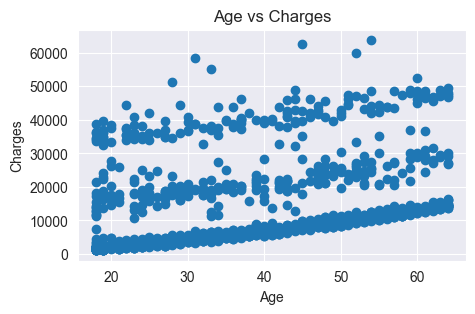

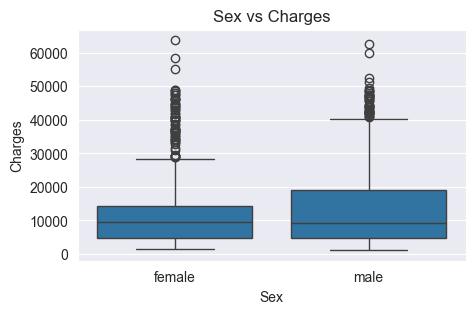

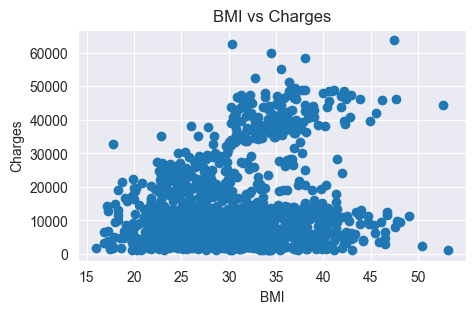

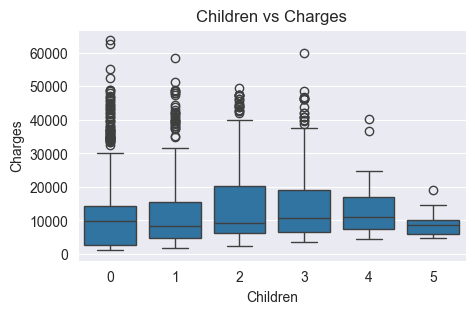

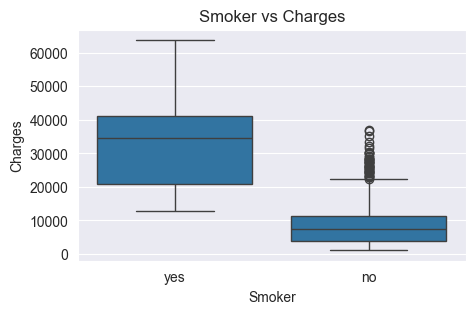

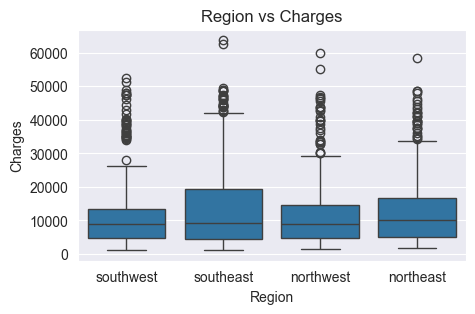

In [494]:
# 1.1.3.Visualize the target variable with respect to the features

# Our target variable is numerical because of that if feature is numerical I use scatter plot, if feature is categorical I use box plot.

# Age-Charges Relationship with scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df['age'], df['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Sex-Charges Relationship with box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()
#In general, there is no significant difference between the charges distributions of male and female individuals.
#It seems that gender does not have a direct impact on charges.

# BMI-Charges Relationship with scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df['bmi'], df['charges'])
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()
#Relationship is not strictly linear.

# Children-Charges Relationship with box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

# Smoker-Charges Relationship with box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
#Smokers have a much higher median charge (~30,000) compared to non-smokers (~7,000).Smoking status appears to have a significant impact on charges.Non-smokers have several outliers but these outliers are much fewer compared to the high charges for smokers.

# Region-Charges Relationship with box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()
#The median charges for all regions are relatively similar.All regions have outliers, representing individuals with very high charges.


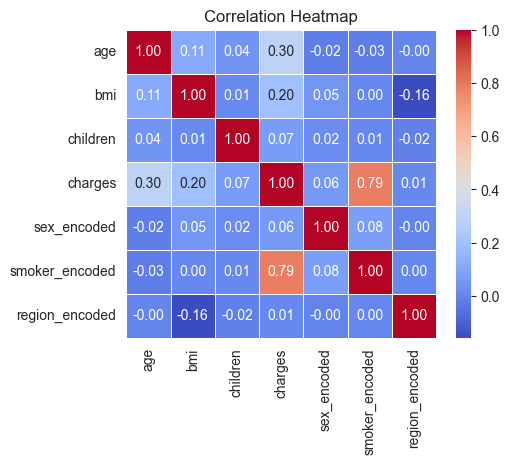

In [495]:
# 1.1.4.Visualize the correlation between the features using a heatmap

def convert_str_to_num(given_df):
    new_df = given_df.copy()
    new_df['sex_encoded'] = new_df['sex'].map({'female': 0, 'male': 1})
    new_df['smoker_encoded'] = new_df['smoker'].map({'no': 0, 'yes': 1})
    new_df['region_encoded'] = new_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

    new_df.drop('sex', axis=1, inplace=True)
    new_df.drop('smoker', axis=1, inplace=True)
    new_df.drop('region', axis=1, inplace=True)

    return new_df

df_corr = convert_str_to_num(df)

# Calculate the correlation matrix

corr_matrix = df_corr.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Correlation between target variable and smoker is strong positive correlation(0.79).
#There is a moderate positive correlation between age and charges(0.30).
#BMI has a weak positive correlation with charges(0.20).

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [496]:
# I use IQR method for outlier detection for numerical values because in data analyzes we see there are skewnesses in some graphs. We can determine outliers with IQR if our data has not normal distribution.

numerical_outliers = []
numerical_col = ['age','bmi']

def outlier_finder(feature):
    outliers_of_feature = []
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower) | (df[feature] > upper)]
    outliers_of_feature.extend(outliers.index)

    return outliers_of_feature

age_outliers = outlier_finder('age')
print("Number of outlier in age feature: ", len(age_outliers))

bmi_outliers = outlier_finder('bmi')
print("Number of outlier in bmi feature: ", len(bmi_outliers))

numerical_outliers.extend(age_outliers)
numerical_outliers.extend(bmi_outliers)

# Delete duplicates
numerical_outliers = list(set(numerical_outliers))

numerical_outliers.sort()

print("Number of numerical outliers: ",len(numerical_outliers))

print("Numerical Outliers:", numerical_outliers)

# Only bmi feature has outlier values.

Number of outlier in age feature:  0
Number of outlier in bmi feature:  9
Numerical Outliers: [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]
Number of numerical outliers:  9


In [514]:
# Outlier Detection in categorical values
cat_outliers = []

categorical_col = ['sex', 'smoker', 'region','children']

# Select a threshold value
lower_threshold = 50

def outlier_finder2(feature):
    outliers_of_feature = []
    counts = df[feature].value_counts()

    outlier_categories = counts[counts < lower_threshold].index

    outliers = df[df[feature].isin(outlier_categories)].index
    outliers_of_feature.extend(outliers)

    return outliers_of_feature

sex_outliers = outlier_finder2('sex')
print("Number of outlier in sex feature: ", len(sex_outliers))
cat_outliers.extend(sex_outliers)

smoker_outliers = outlier_finder2('smoker')
print("Number of outlier in smoker feature: ", len(smoker_outliers))
cat_outliers.extend(smoker_outliers)

region_outliers = outlier_finder2('region')
print("Number of outlier in region feature: ", len(region_outliers))
cat_outliers.extend(region_outliers)

children_outliers = outlier_finder2('children')
print("Number of outlier in children feature: ", len(children_outliers))
cat_outliers.extend(children_outliers)

cat_outliers = sorted(set(cat_outliers))

print("number of categorical outliers: ",len(cat_outliers))
print("Categorical Outliers:", cat_outliers)

# Only children feature has outlier values.

Number of outlier in sex feature:  0
Number of outlier in smoker feature:  0
Number of outlier in region feature:  0
Number of outlier in children feature:  43
number of categorical outliers:  43
Categorical Outliers: [32, 61, 71, 83, 165, 166, 211, 258, 321, 344, 390, 413, 425, 438, 450, 494, 568, 621, 639, 640, 659, 754, 877, 884, 891, 932, 937, 969, 984, 1012, 1064, 1085, 1094, 1095, 1116, 1130, 1154, 1245, 1247, 1253, 1272, 1307, 1318]


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [498]:
# Original dataset for comparison

df_original = df.copy()

print("ORIGINAL DATASET: \n", df_original.shape)

# Remove outliers
df_removed_outliers = df.drop(index=numerical_outliers)
df_removed_outliers = df_removed_outliers.drop(index= cat_outliers)
print("DATASET AFTER OUTLIER REMOVAL: \n", df_removed_outliers.shape)

# Mean Imputation
df_mean_imputed = df.copy()

for feature in numerical_col:

    # Find feature's mean and fill numerical outlier values with mean
    mean_value = df[feature].mean()
    df_mean_imputed.loc[numerical_outliers, feature] = mean_value

for feature in categorical_col:

    # Find mode of feature and fill categorical outliers with mode
    mode_value = df[feature].mode()[0]
    df_mean_imputed.loc[cat_outliers, feature] = mode_value


print("DATASET AFTER MEAN IMPUTATION: \n ", df_mean_imputed.shape)

# Median Imputation
df_median_imputed = df.copy()

for feature in numerical_col:

    # Find feature's median and fill numerical outliers with median
    median_value = df[feature].median()
    df_median_imputed.loc[numerical_outliers, feature] = median_value


for feature in categorical_col:

    # Find mode of feature and fill categorical outliers with mode
    mode_value = df[feature].mode()[0]
    df_median_imputed.loc[cat_outliers, feature] = mode_value


print("DATASET AFTER MEDIAN IMPUTATION: \n", df_median_imputed.shape)


ORIGINAL DATASET: 
 (1338, 7)
DATASET AFTER OUTLIER REMOVAL: 
 (1286, 7)
DATASET AFTER MEAN IMPUTATION: 
  (1338, 7)
DATASET AFTER MEDIAN IMPUTATION: 
 (1338, 7)


C:\Users\Sude Naz OZTURK\AppData\Local\Temp\ipykernel_9824\1643727316.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.20702541106129' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mean_imputed.loc[numerical_outliers, feature] = mean_value


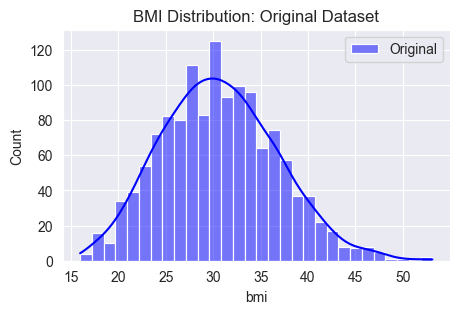

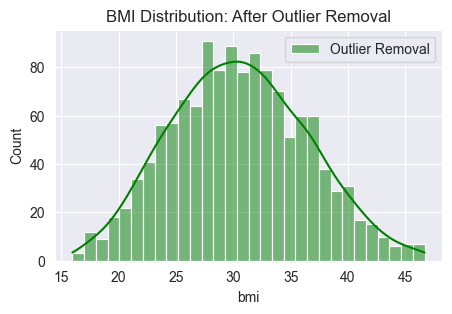

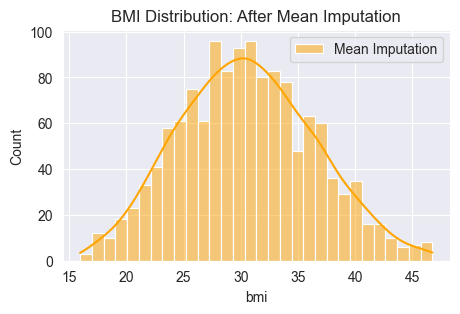

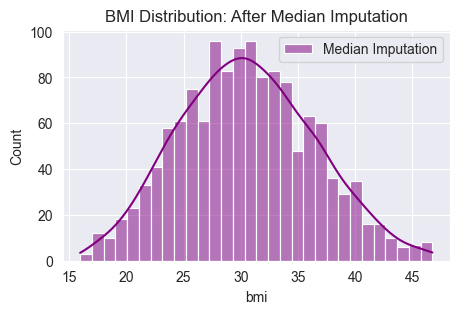

In [499]:
# Visualizations for bmi
# I am showing BMI plots because in numerical features only bmi has outlier so only bmi values is changing.

# Original dataset distribution
plt.figure(figsize=(5, 3))
sns.histplot(df_original['bmi'], kde=True, bins=30, color='blue', label='Original')
plt.title('BMI Distribution: Original Dataset')
plt.legend()
plt.show()

# Step 2: After outlier removal
plt.figure(figsize=(5, 3))
sns.histplot(df_removed_outliers['bmi'], kde=True, bins=30, color='green', label='Outlier Removal')
plt.title('BMI Distribution: After Outlier Removal')
plt.legend()
plt.show()

# Step 3: After mean imputation
plt.figure(figsize=(5, 3))
sns.histplot(df_mean_imputed['bmi'], kde=True, bins=30, color='orange', label='Mean Imputation')
plt.title('BMI Distribution: After Mean Imputation')
plt.legend()
plt.show()

# Step 4: After median imputation
plt.figure(figsize=(5, 3))
sns.histplot(df_median_imputed['bmi'], kde=True, bins=30, color='purple', label='Median Imputation')
plt.title('BMI Distribution: After Median Imputation')
plt.legend()
plt.show()


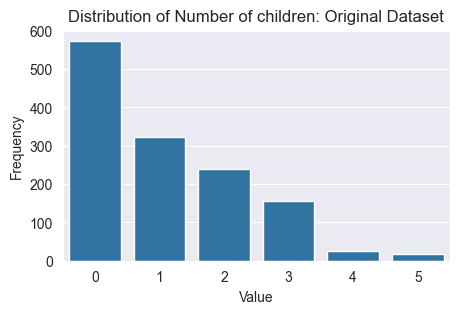

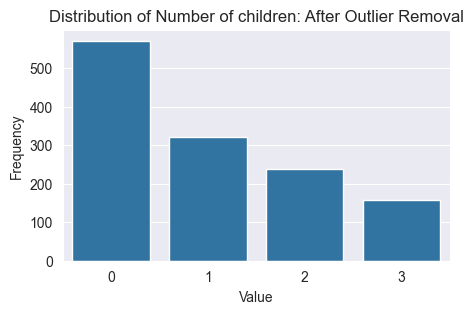

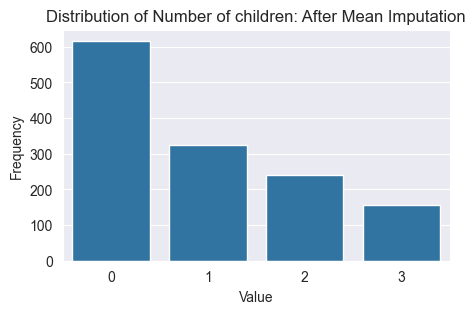

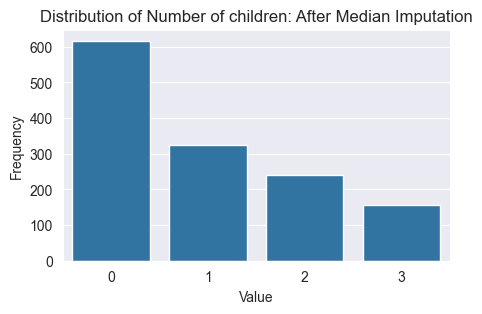

In [515]:
#Visualization for number of children
# I am showing 

# Original dataset distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='children', data=df_original)
plt.title('Distribution of Number of children: Original Dataset')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 2: After outlier removal
plt.figure(figsize=(5, 3))
sns.countplot(x='children', data=df_removed_outliers)
plt.title('Distribution of Number of children: After Outlier Removal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Step 3: After mean imputation
plt.figure(figsize=(5, 3))
sns.countplot(x='children', data=df_mean_imputed)
plt.title('Distribution of Number of children: After Mean Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# Step 4: After median imputation
plt.figure(figsize=(5, 3))
sns.countplot(x='children', data=df_median_imputed)
plt.title('Distribution of Number of children: After Median Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [501]:
df_encoded = df.copy()

ordinal_categories = [['no', 'yes']]

encoder = OrdinalEncoder(categories=ordinal_categories)

df_encoded['smoker_encoded'] = encoder.fit_transform(df[['smoker']])


## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split. (8 Pts)

* ***You  cannot use scikit-learn's shuffle.***

In [502]:
# Func to shuffle and split it into train and test sets any kind of df
def shuffle_and_split(given_df):
    df_shuffled = given_df.sample(frac=1, random_state=42).reset_index(drop=True)
    split_index = int(0.7 * len(df_shuffled))
    df_train = df_shuffled.iloc[:split_index]
    df_test = df_shuffled.iloc[split_index:]

    return df_train,df_test


# **PART- 2: REGRESSION (50 Pts)**
* Target value: charges
* Predictors: The rest

* ***You can use scikit-learn***





## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data.
    * Predict the test set and calculate the MSE value for each k.
    * Plot the MSE vs k curve to decide on the optimal k.
    * Report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?


In [503]:
# Create necessary functions to knn

def split_to_x_y(given_df_train,given_df_test):
    X_train = given_df_train.drop(columns =['charges'])
    y_train = given_df_train['charges']

    X_test = given_df_test.drop(columns=['charges'])
    y_test = given_df_test['charges']

    return X_train,y_train,X_test,y_test


def knn(X_train,y_train,X_test,y_test):
    mse_list=[]
    k_values = range(1, 31)
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_test_scaled = sc.transform(X_test)
    for i in range(1,31):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train_scaled, y_train)

        y_pred = knn.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)


    optimal_k = k_values[mse_list.index(min(mse_list))]
    min_mse = min(mse_list)
    knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
    knn_optimal.fit(X_train_scaled, y_train)
    y_pred_optimal = knn_optimal.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_optimal)

    # Plot the MSE values against k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mse_list, marker='o', linestyle='-', color='b')
    plt.title('MSE vs k ')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('MSE')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

    del mse_list

    return optimal_k,r2,min_mse



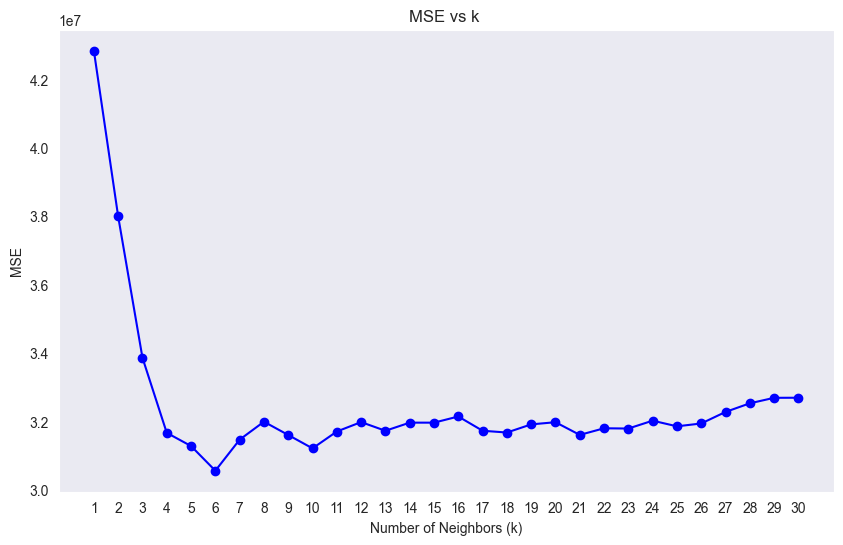

Optimal k value for original dataset is :  6
MSE for optimal k value:  30556732.57886174
R-squared Value for original dataset is :  0.7823467033656473


In [504]:
# Original Dataset

converted_df = convert_str_to_num(df_original)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
opt_k,r2,min_mse_1 = knn(X_train,y_train,X_test,y_test)

print("Optimal k value for original dataset is : ",opt_k)
print("MSE for optimal k value: ", min_mse_1)
print("R-squared Value for original dataset is : ", r2)

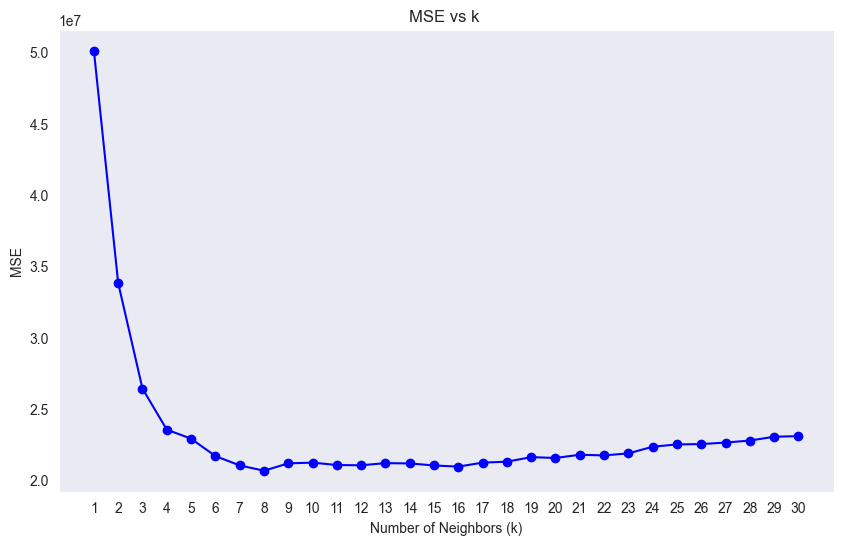

Optimal k value for outlier removed dataset is :  8
MSE for optimal k value:  20647312.302823417
R-squared Value for outlier removed dataset is :  0.8599436941951583


In [505]:
# Outlier Removed

converted_df = convert_str_to_num(df_removed_outliers)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
opt_k,r2,min_mse_2 = knn(X_train,y_train,X_test,y_test)

print("Optimal k value for outlier removed dataset is : ", opt_k)
print("MSE for optimal k value: ", min_mse_2)
print("R-squared Value for outlier removed dataset is : ", r2)

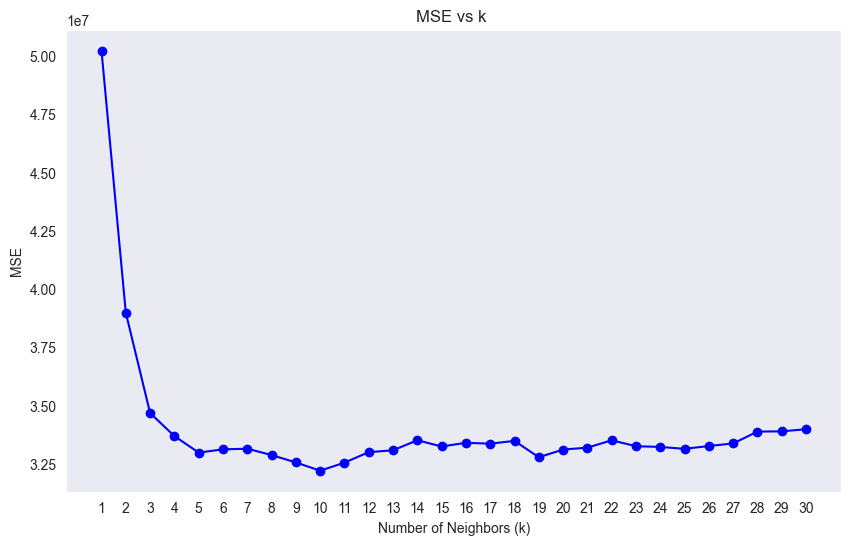

Optimal k value for mean imputed dataset is :  10
MSE for optimal k value:  32212655.90149409
R-squared Value for mean imputed dataset is :  0.7705516866957705


In [506]:
# Mean Imputed

converted_df = convert_str_to_num(df_mean_imputed)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
opt_k,r2,min_mse_3 = knn(X_train,y_train,X_test,y_test)

print("Optimal k value for mean imputed dataset is : ", opt_k)
print("MSE for optimal k value: ", min_mse_3)
print("R-squared Value for mean imputed dataset is : ", r2)

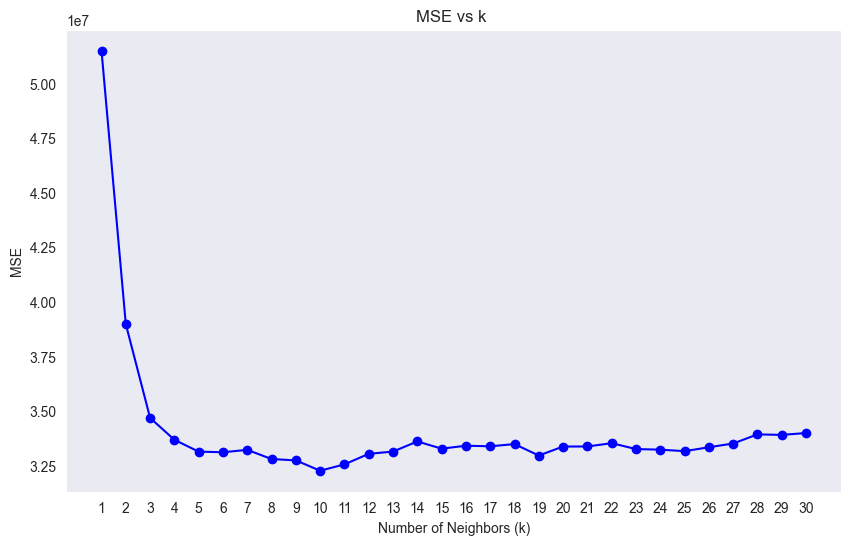

Optimal k value for median imputed dataset is :  10
MSE for optimal k value:  32267523.54093716
R-squared Value for median imputed dataset is :  0.7701608686469982


In [507]:
# Median Imputed

converted_df = convert_str_to_num(df_median_imputed)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
opt_k,r2,min_mse_4 = knn(X_train,y_train,X_test,y_test)


print("Optimal k value for median imputed dataset is : ", opt_k)
print("MSE for optimal k value: ", min_mse_4)
print("R-squared Value for median imputed dataset is : ", r2)

According to all datasets' R-squared values, the best dataset is median imputed dataset because bigger R-square value shows that model's performance is better.

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following steps:
    * Split the data into train and test sets
    * Fit a linear regression model to train data.
    * Predict the test set and calculate the MSE value.

In [508]:
# Create necessary functions

def linear_regression(X_train,y_train,X_test,y_test):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    return mse,r2

In [509]:
# Original Data

converted_df = convert_str_to_num(df_original)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
mse1,r2 = linear_regression(X_train,y_train,X_test,y_test)

print("MSE for original dataset is: ", mse1)

MSE for original dataset is:  40037615.00476719


In [510]:
# Outlier Removed

converted_df = convert_str_to_num(df_removed_outliers)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
mse2,r2 = linear_regression(X_train,y_train,X_test,y_test)

print("MSE for outlier removed dataset is: ", mse2)

MSE for outlier removed dataset is:  32309874.56037031


In [511]:
# Mean Imputed

converted_df = convert_str_to_num(df_mean_imputed)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
mse3,r2 = linear_regression(X_train,y_train,X_test,y_test)

print("MSE for mean imputed dataset is: ", mse3)

MSE for mean imputed dataset is:  40821988.334904544


In [512]:
# Median Imputed

converted_df = convert_str_to_num(df_median_imputed)
df_train,df_test = shuffle_and_split(converted_df)
X_train,y_train,X_test,y_test = split_to_x_y(df_train,df_test)
mse4,r2 = linear_regression(X_train,y_train,X_test,y_test)

print("MSE for median imputed dataset is: ", mse4)

MSE for median imputed dataset is:  40834409.120707266


## 2.3. Compare the Regression Methods (10 Pts)

* Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.).

* Discuss the strengths and limitations of each model based on your results

In [513]:
print("MSE COMPARISON BETWEEN KNN AND LINEAR REGRESSION :")
print("-------------------------------------------------")
print("KNN Regression-Original Dataset MSE is: ",min_mse_1)
print("Linear Regression-Original Dataset MSE is: ", mse1)
print("\nLinear Regression's MSE is bigger so KNN's performance is better.")
print("-------------------------------------------------")
print("KNN Regression-Outlier Removed Dataset MSE is: ",min_mse_2)
print("Linear Regression-Outlier Removed Dataset MSE is: ", mse2)
print("\nLinear Regression's MSE is bigger so KNN's performance is better.")
print("-------------------------------------------------")
print("KNN Regression-Mean Imputed Dataset MSE is: ",min_mse_3)
print("Linear Regression-Mean Imputed Dataset MSE is: ", mse3)
print("\nLinear Regression's MSE is bigger so KNN's performance is better.")
print("-------------------------------------------------")
print("KNN Regression-Median Imputed Dataset MSE is: ",min_mse_4)
print("Linear Regression-Median Imputed Dataset MSE is: ", mse4)
print("\nLinear Regression's MSE is bigger so KNN's performance is better.")


MSE COMPARISON BETWEEN KNN AND LINEAR REGRESSION :
-------------------------------------------------
KNN Regression-Original Dataset MSE is:  30556732.57886174
Linear Regression-Original Dataset MSE is:  40037615.00476719

KNN's MSE is bigger so Linear Regression's performance is better.
-------------------------------------------------
KNN Regression-Outlier Removed Dataset MSE is:  20647312.302823417
Linear Regression-Outlier Removed Dataset MSE is:  32309874.56037031

KNN's MSE is bigger so Linear Regression's performance is better.
-------------------------------------------------
KNN Regression-Mean Imputed Dataset MSE is:  32212655.90149409
Linear Regression-Mean Imputed Dataset MSE is:  40821988.334904544

KNN's MSE is bigger so Linear Regression's performance is better.
-------------------------------------------------
KNN Regression-Median Imputed Dataset MSE is:  32267523.54093716
Linear Regression-Median Imputed Dataset MSE is:  40834409.120707266

KNN's MSE is bigger so Lin

# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw3.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.